In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('combined_metrics.csv')

df.head()

,Mean_X,Std Dev_X,Energy_X,Entropy_X,Peaks_X,Mean_Y,Std Dev_Y,Energy_Y,Entropy_Y,Peaks_Y,Mean_Mixed,Std Dev_Mixed,Energy_Mixed,Entropy_Mixed,Peaks_Mixed,category
0,0.025967,0.149649,2.284523,-10.269194,17,0.019115,0.236742,5.585155,-1.251265,20,0.268438,0.139471,9.131639,-18.530758,27,1
1,0.024132,0.149547,2.272307,-10.310649,16,0.020332,0.237447,5.623074,-1.204877,20,0.269707,0.139023,9.187616,-18.425003,26,1
2,0.021001,0.150147,2.275984,-9.992131,16,0.021384,0.237961,5.651662,-1.171929,20,0.270788,0.138690,9.236838,-18.255960,27,1
3,0.019992,0.149930,2.265391,-10.067565,16,0.025724,0.243507,5.936428,-0.909256,20,0.274968,0.141341,9.538472,-17.979045,27,1
4,0.019370,0.149982,2.264473,-10.036759,17,0.029207,0.246331,6.092519,-0.772432,21,0.278490,0.140402,9.707206,-18.063853,27,1


In [2]:
df.shape


(4388, 16)

In [3]:
df.tail()

,Mean_X,Std Dev_X,Energy_X,Entropy_X,Peaks_X,Mean_Y,Std Dev_Y,Energy_Y,Entropy_Y,Peaks_Y,Mean_Mixed,Std Dev_Mixed,Energy_Mixed,Entropy_Mixed,Peaks_Mixed,category
4383,0.214906,0.112443,0.281496,-116.412066,1,0.138406,0.176730,0.220716,-50.211951,1,0.311434,0.104847,0.528928,-108.551854,0,5
4384,0.207961,0.128594,0.222601,-131.555058,0,0.087196,0.155440,0.102898,-103.405637,1,0.283856,0.097912,0.351057,-150.436535,0,5
4385,0.174230,0.134082,0.127024,-137.517025,0,0.053670,0.171751,0.067638,-106.632036,1,0.250642,0.088097,0.203987,-247.041028,0,5
4386,0.113356,0.117140,0.039421,-296.728106,0,0.016129,0.224812,0.051061,-125.031010,0,0.212383,0.082097,0.096953,-467.558932,0,5
4387,0.030525,NaN,0.000932,-33.219281,0,-0.142838,NaN,0.020403,-33.219281,0,0.154332,NaN,0.023818,-33.219281,0,5


<Axes: xlabel='category', ylabel='count'>

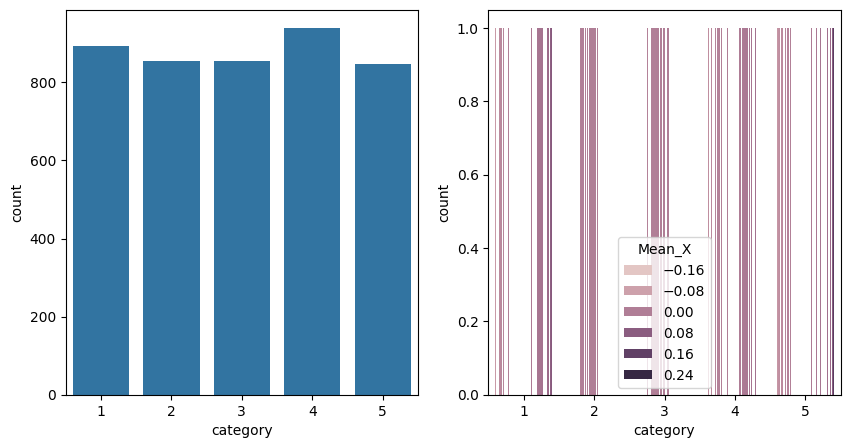

In [5]:
plt.figure(figsize =[10,5])
plt.subplot(121)
sns.countplot(x='category',data =df)
plt.subplot(122)
sns.countplot(x='category', hue = 'Mean_X',data =df)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

extracted_features = pd.read_csv('combined_metrics.csv')

# Separate features (X) and target variable (y)
X = extracted_features.drop(columns=['category'])
y = extracted_features['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle infinity and large values by replacing them with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train.fillna(X_train.mean(), inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [13]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [14]:
y_pred = knn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"KNN classification accuracy: {accuracy}")

KNN classification accuracy: 0.7167805618830676


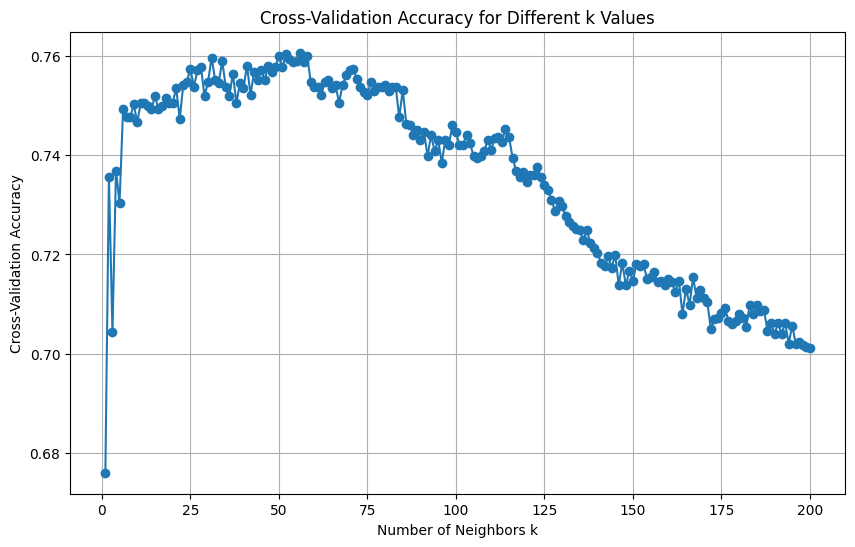

The optimal number of neighbors is 56 with cross-validation accuracy of 0.7607


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
k_values = range(1, 201)
cross_val_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

# Plot the cross-validation accuracy against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o')
plt.title('Cross-Validation Accuracy for Different k Values')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Find and print the optimal k value
optimal_k = k_values[np.argmax(cross_val_scores)]
print(f"The optimal number of neighbors is {optimal_k} with cross-validation accuracy of {max(cross_val_scores):.4f}")


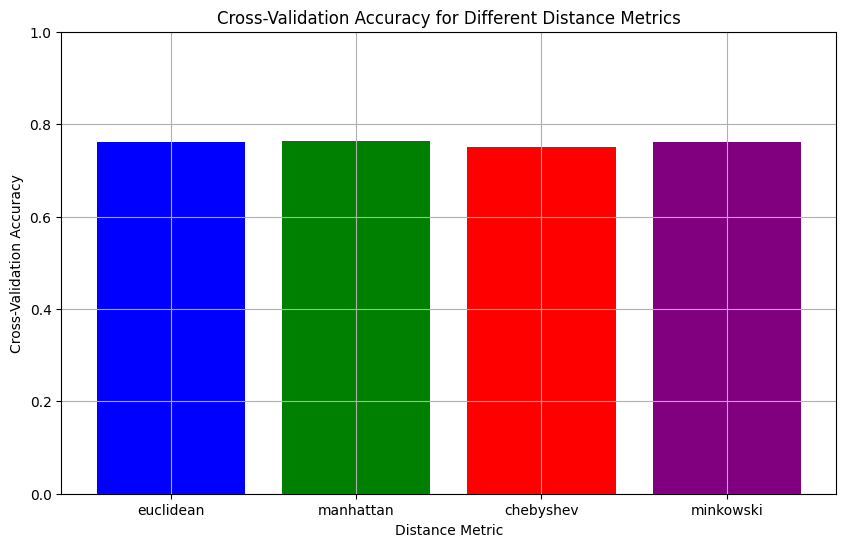

Metric: euclidean, Cross-Validation Accuracy: 0.7607
Metric: manhattan, Cross-Validation Accuracy: 0.7639
Metric: chebyshev, Cross-Validation Accuracy: 0.7496
Metric: minkowski, Cross-Validation Accuracy: 0.7607


In [19]:
distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Store cross-validation scores for each metric
cv_scores = {}

# Perform cross-validation for each distance metric
for metric in distance_metrics:
    knn = KNeighborsClassifier(metric=metric, n_neighbors=56)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores[metric] = scores.mean()

# Plot the cross-validation accuracy for each distance metric
plt.figure(figsize=(10, 6))
plt.bar(cv_scores.keys(), cv_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Cross-Validation Accuracy for Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Cross-Validation Accuracy')
plt.ylim(0.0, 1.0)  # Adjust the y-axis for better visualization
plt.grid(True)
plt.show()

for metric, score in cv_scores.items():
    print(f"Metric: {metric}, Cross-Validation Accuracy: {score:.4f}")


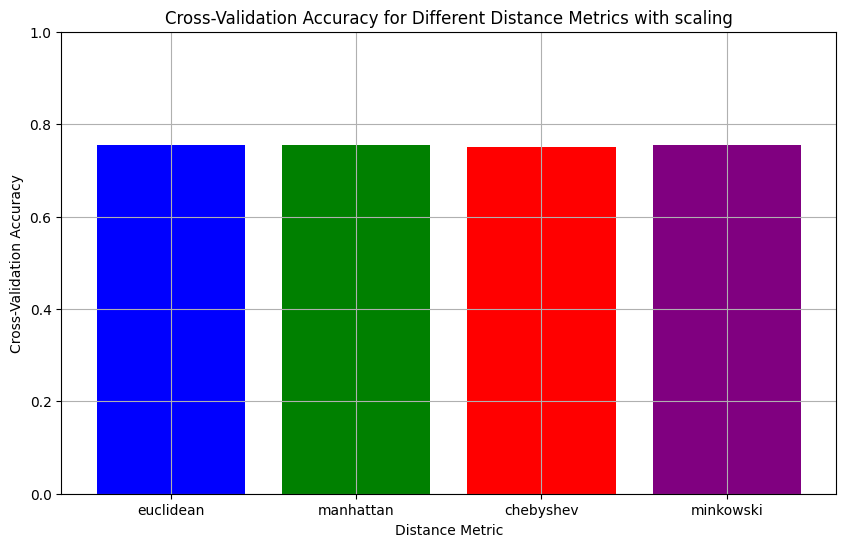

Metric: euclidean, Cross-Validation Accuracy: 0.7548
Metric: manhattan, Cross-Validation Accuracy: 0.7545
Metric: chebyshev, Cross-Validation Accuracy: 0.7506
Metric: minkowski, Cross-Validation Accuracy: 0.7548


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

distance_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

# Store cross-validation scores for each metric
cv_scores = {}

# Perform cross-validation for each distance metric
for metric in distance_metrics:
    knn = KNeighborsClassifier(metric=metric, n_neighbors=16)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores[metric] = scores.mean()

# Plot the cross-validation accuracy for each distance metric
plt.figure(figsize=(10, 6))
plt.bar(cv_scores.keys(), cv_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Cross-Validation Accuracy for Different Distance Metrics with scaling')
plt.xlabel('Distance Metric')
plt.ylabel('Cross-Validation Accuracy')
plt.ylim(0.0, 1.0)  # Adjust the y-axis for better visualization
plt.grid(True)
plt.show()

for metric, score in cv_scores.items():
    print(f"Metric: {metric}, Cross-Validation Accuracy: {score:.4f}")